In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_hdf("../simulation_measurement_comparison/simulated_and_measured_with_cj.h5")

In [3]:
data.keys()

Index(['diluent', 'phi_nom', 'dil_mf_nom', 'p_0', 'u_p_0', 't_0', 'phi',
       'u_phi', 'dil_mf', 'u_dil_mf', 'wave_speed', 'u_wave_speed',
       'cell_size_measured', 'u_cell_size_measured', 'cell_size_gavrikov',
       'cell_size_ng', 'cell_size_westbrook', 'cj'],
      dtype='object')

In [4]:
test = data\
    .set_index([c for c in data.columns if c not in ("wave_speed", "cj")])\
    .rename(columns={"wave_speed": "measured", "cj": "simulated"})\
    .stack()\
    .rename("speed")\
    .to_frame()\
    .reset_index()\
    .rename(columns={"level_16": "source"})


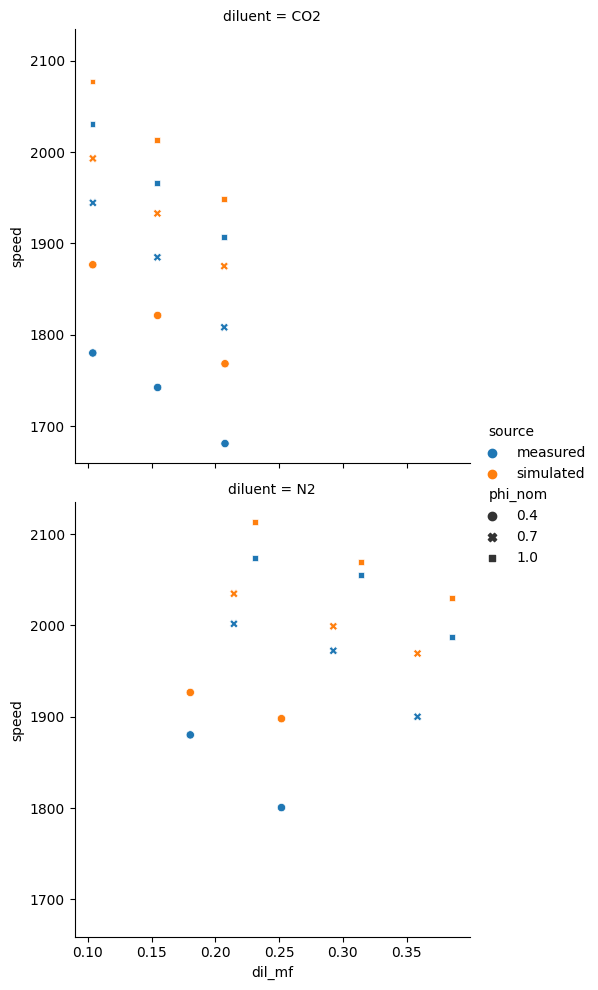

In [5]:
ag = sns.relplot(
    x="dil_mf",
    y="speed",
    row="diluent",
    style="phi_nom",
    hue="source",
    data=test,
    kind="scatter",
)

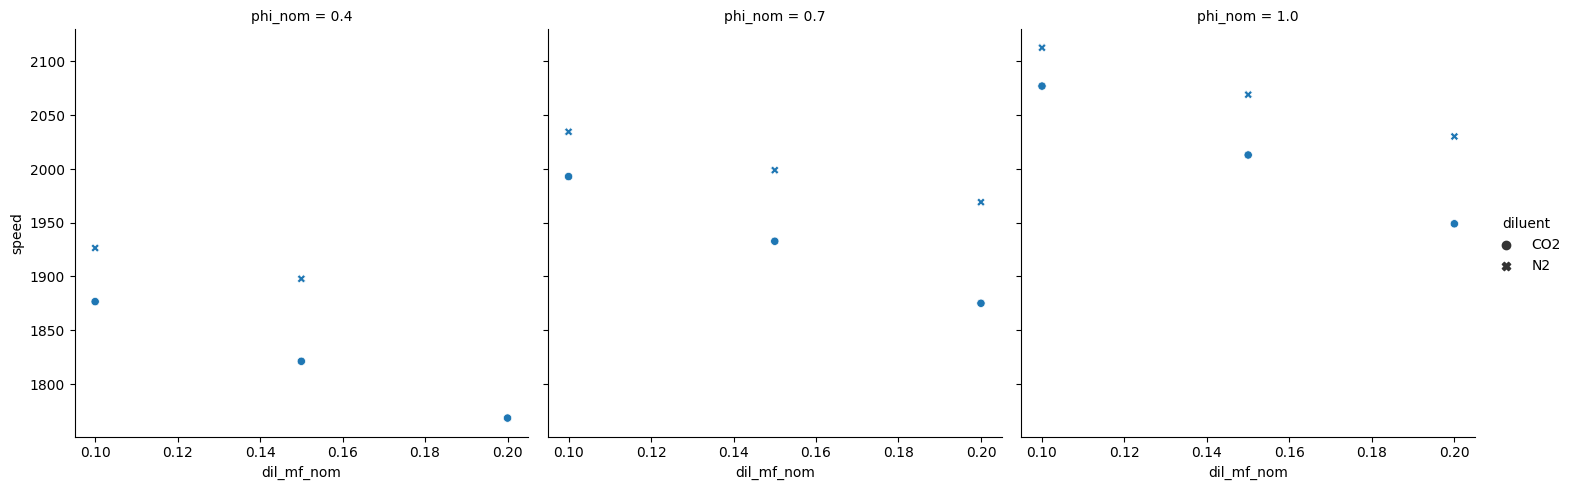

In [10]:
ag = sns.relplot(
    x="dil_mf_nom",
    y="speed",
    col="phi_nom",
    style="diluent",
    data=test[test["source"] == "simulated"],
    kind="scatter",
)

94.85360799077469

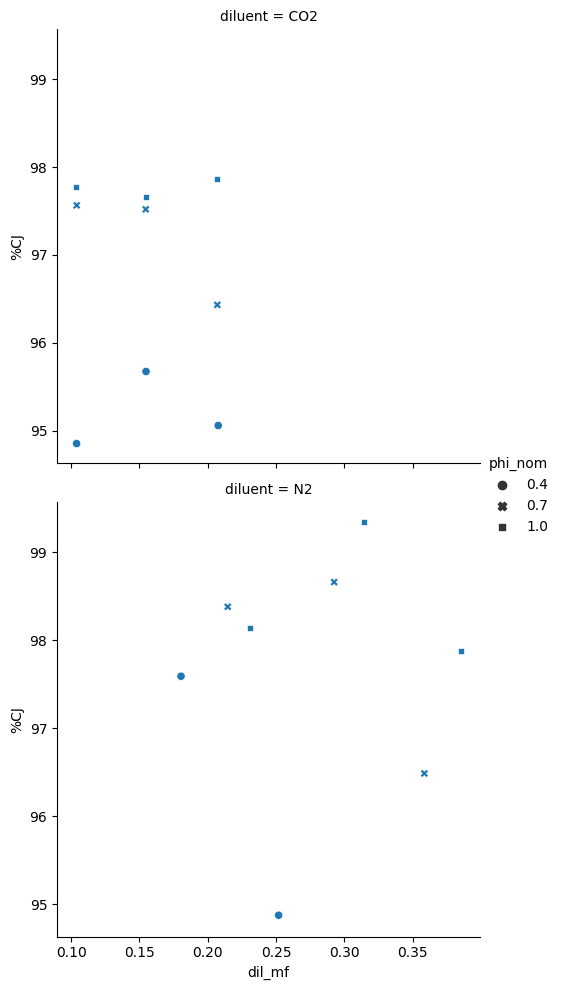

In [64]:
reindexed = test.set_index([c for c in test.columns if c not in ("source", "speed")])
pct_cj = (
    reindexed[reindexed["source"] == "measured"]["speed"] / 
    reindexed[reindexed["source"] == "simulated"]["speed"]
).mul(100).rename("%CJ").to_frame().reset_index()
sns.relplot(
    x="dil_mf",
    y="%CJ",
    row="diluent",
    style="phi_nom",
    data=pct_cj,
    kind="scatter",
)
pct_cj["%CJ"].min()